# Exercise 0

This is a simple example on how to use Mad-X in Python to match a 10 m long FODO lattice. Each quadrupole is 1.5 m long.

In [1]:
!pwd
from cpymad.madx import Madx
madx = Madx()
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display for more resolution

/home/alejandro/Desktop/ML-Optic-Correction/src/examples/juas_notebooks

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.02.09 14:18:13      +
  ++++++++++++++++++++++++++++++++++++++++++++


/tmp/ipykernel_86002/530373829.py:7: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


### 1. Definition of the elements

For each element in the machine (dipole, quadrupole, sextupoles, solenoids,...) we can define its properties.

In [2]:
elementDefinition='''
/****Definition of elements****/
qfType:QUADRUPOLE, L=0.5, K1:=kf;
qdType:QUADRUPOLE, L=0.5, K1:=kd;
'''
madx.input(elementDefinition);

###  2. Definition of the sequence

This is a FODO cell.

In [3]:
sequenceDefinition='''
/****Definition of the sequence****/
fodo:SEQUENCE, REFER=exit, L=10;
qf: qfType, at=5;
qd: qdType, at=10;
ENDSEQUENCE;
'''
madx.input(sequenceDefinition);

### 3. Definition of the strenght

In [4]:
strengthDefinition='''
/****Definition of the strength****/
kf=+0.2985;
kd:=-kf;'''
madx.input(strengthDefinition);

### 4. Definition of the beam

In [5]:
beamDefinition='''
/****Definition of the beam****/
beam;
'''
madx.input(beamDefinition);

### Activation of the sequence

In [6]:
sequenceActivation='''
use, sequence=fodo;
'''
madx.input(sequenceActivation);

### Finding the periodic solution with the TWISS

In [7]:
madx.input('twiss;');

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.1173811911      -0.1230012214        19.73920011                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.1173811911 

               dq2            betymax              dymax              dyrms 
     -0.1230012214        19.73920011                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

In [8]:
# importing the twiss table in a pandas dataframe
myDF_BeforeMatching=madx.table.twiss.dframe()
myDF_BeforeMatching.columns

Index(['name', 'keyword', 's', 'betx', 'alfx', 'mux', 'bety', 'alfy', 'muy',
       'x',
       ...
       'sig54', 'sig55', 'sig56', 'sig61', 'sig62', 'sig63', 'sig64', 'sig65',
       'sig66', 'n1'],
      dtype='object', length=256)

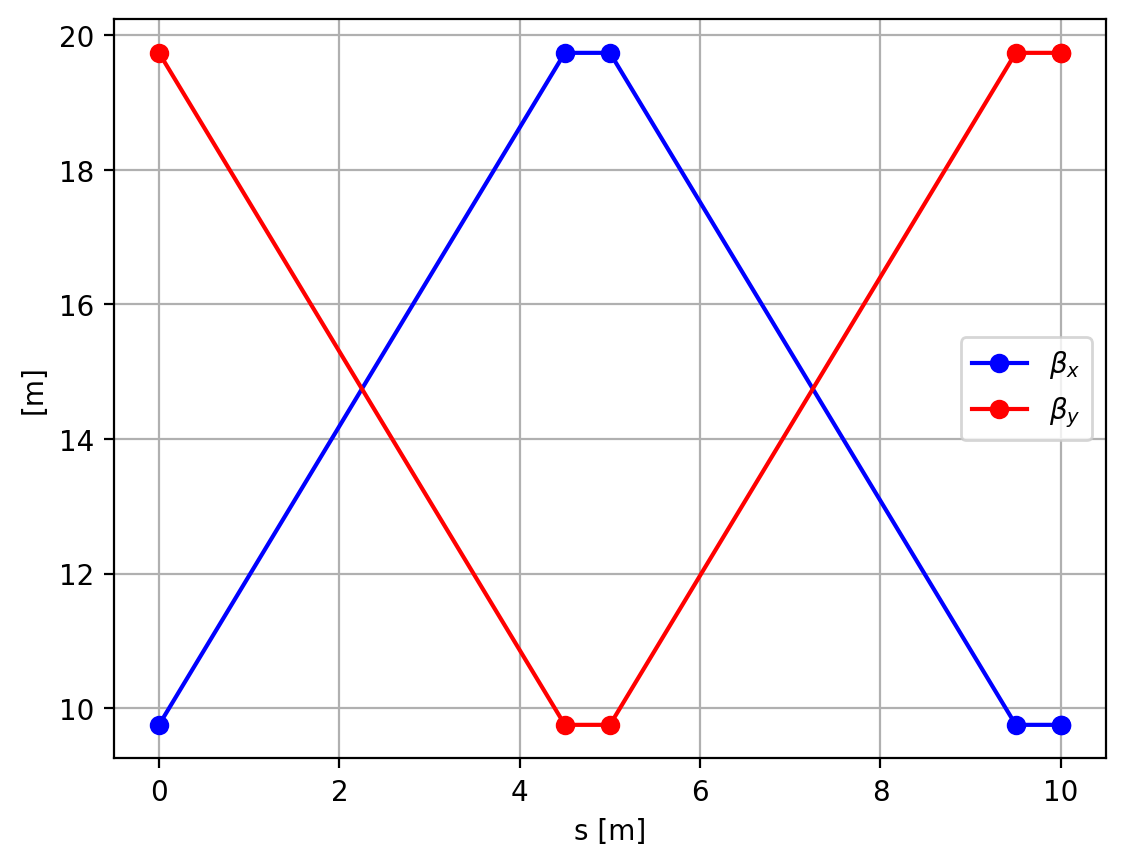

In [9]:
# plotting the results
plt.plot(myDF_BeforeMatching.s,myDF_BeforeMatching.betx,'o-b', label='$\\beta_x$')
plt.plot(myDF_BeforeMatching.s,myDF_BeforeMatching.bety,'o-r', label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.grid()
plt.legend()

### Matching of the FODO cell
We match the cell for 90 deg phase advance.

In [10]:
matchingDefinition='''
/****Matching****/
MATCH, sequence=fodo;
  GLOBAL, Q1=.25;
  GLOBAL, Q2=.25;
  VARY, NAME=kf, STEP=0.00001;
  VARY, NAME=kd, STEP=0.00001;
  LMDIF, CALLS=50, TOLERANCE=1e-8;
ENDMATCH;'''
madx.input(matchingDefinition);

START MATCHING

number of sequences: 1
sequence name: fodo
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.35175497E+01


call:       4   Penalty function =   0.75929965E-01
call:       7   Penalty function =   0.76971031E-04
call:      10   Penalty function =   0.73186556E-10
 ++++++++++ LMDIF ended: converged successfully
call:      10   Penalty function =   0.73186556E-10

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     2.50000000E-01     2.50000604E-01     3.64516647E-11
Global constraint:         q2           4     2.50000000E-01     2.50000606E-01     3.67348911E-11


Final Penalty Function =   7.31865558e-11





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------

In [11]:
madx.input('twiss;')
myDF_AfterMatching=madx.table.twiss.dframe()

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2500006038      -0.3182411001        16.26148602                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2500006061 

               dq2            betymax              dymax              dyrms 
     -0.3182411024        16.26148598                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

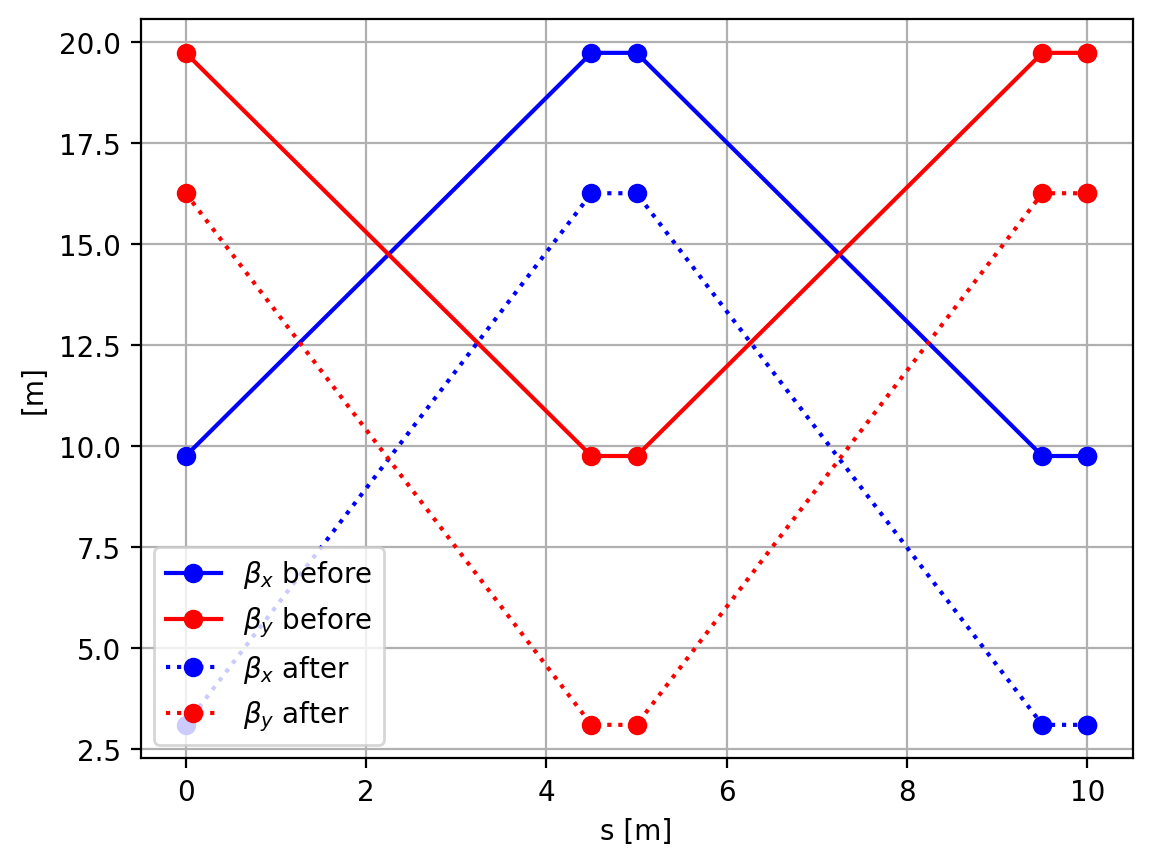

In [12]:
# plotting the results
# BM: before matching
plt.plot(myDF_BeforeMatching.s,myDF_BeforeMatching.betx,'o-b', label='$\\beta_x$ before')
plt.plot(myDF_BeforeMatching.s,myDF_BeforeMatching.bety,'o-r', label='$\\beta_y$ before')

# AM: after matching
plt.plot(myDF_AfterMatching.s,myDF_AfterMatching.betx,'o:b', label='$\\beta_x$ after')
plt.plot(myDF_AfterMatching.s,myDF_AfterMatching.bety,'o:r', label='$\\beta_y$ after')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.grid()
plt.legend()

**Conclusion**: clearly we have reduced significantly the envelope of the beam!

### Comparison thin-thick approach
We match the thick lattice at 20,30,...150 deg and  plot K1 L vs Q1, Q2. We compare the results with the analytical formula in thin lens approximaition.

In [13]:
k1list=[]
Q1list=[]
for i in np.arange(20,160,10):
    print('\n===========================')
    matchingDefinition='''
    /****Matching****/
    option, echo=false;
    MATCH, sequence=fodo;
      GLOBAL, Q1='''+ str(i/360.) +''';
      GLOBAL, Q2='''+ str(i/360.)+''';
      VARY, NAME=kf, STEP=0.00001;
      VARY, NAME=kd, STEP=0.00001;
      LMDIF, CALLS=50, TOLERANCE=1e-8;
    ENDMATCH;'''
    madx.input(matchingDefinition);
    k1list.append(madx.elements.qfType.k1)
    Q1list.append(madx.table.summ.Q1[0])


START MATCHING

number of sequences: 1
sequence name: fodo
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.75617754E+01


call:       4   Penalty function =   0.21981792E+00
call:       7   Penalty function =   0.35778167E-04
call:      10   Penalty function =   0.12514567E-11
 ++++++++++ LMDIF ended: converged successfully
call:      10   Penalty function =   0.12514567E-11

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     5.55555556E-02     5.55555449E-02     1.13482138E-14
Global constraint:         q2           4     5.55555556E-02     5.55556669E-02     1.24010844E-12


Final Penalty Function =   1.25145666e-12





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
-------------

/tmp/ipykernel_86002/2501991295.py:6: RuntimeWarning: invalid value encountered in arcsin
  plt.plot(np.array(k1list)*madx.elements.qfType.l,np.arcsin(10/(4*f))/np.pi,'.-r', label='thin lens approximation')


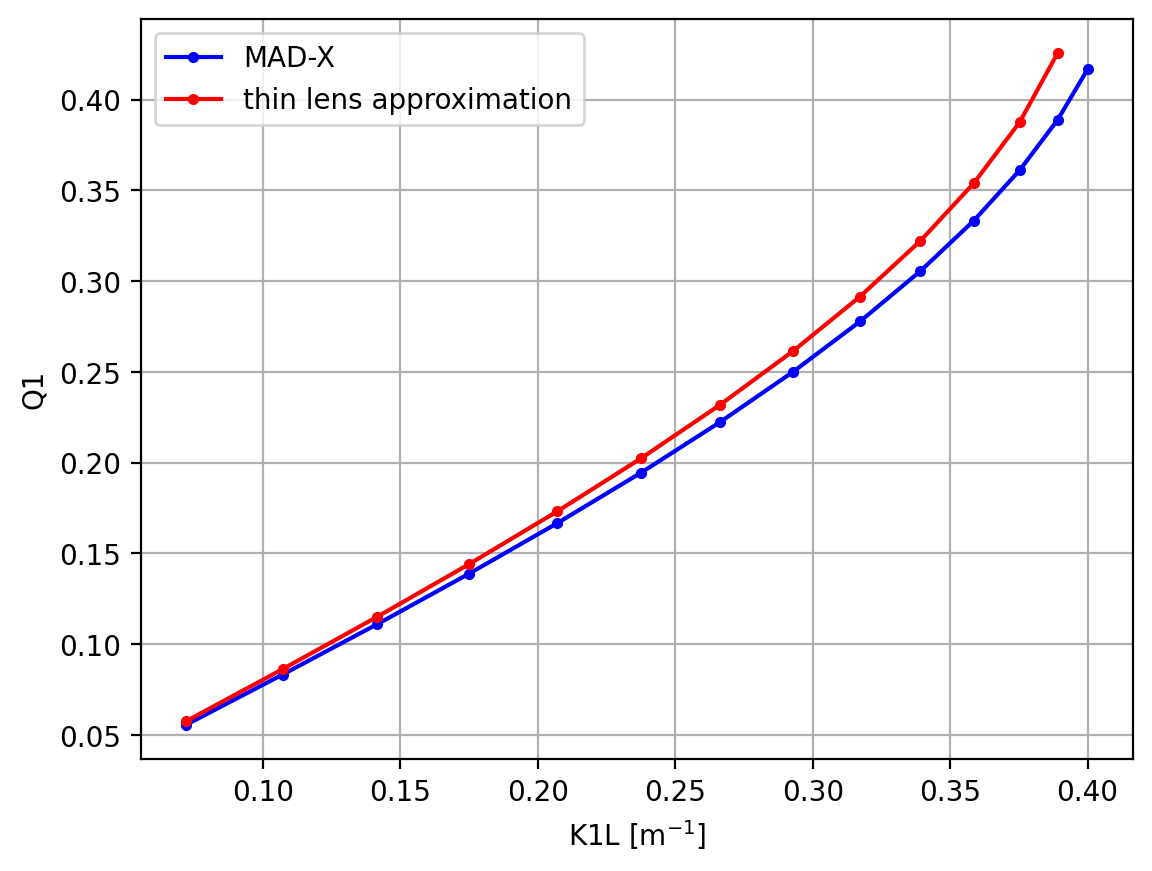

In [14]:
plt.plot(np.array(k1list)*madx.elements.qfType.l, Q1list,'.-b', label='MAD-X')
plt.grid()
plt.ylabel('Q1')
plt.xlabel('K1L [m$^{-1}$]')
f=1/np.array(k1list)/madx.elements.qfType.l
plt.plot(np.array(k1list)*madx.elements.qfType.l,np.arcsin(10/(4*f))/np.pi,'.-r', label='thin lens approximation')
plt.legend(loc='best')